# Human Activity Recognition Using Smartphones
## Classification Model Comparison
**Name:** Akeem Jokosenumi

**Student ID:** G00366442

### Introduction
This assignment involves comparing three classification algorithms (SVM, Logistic Regression, and Random Forest) on the Human Activity Recognition dataset. The goal is to select the best model for deployment.

In [143]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style (using seaborn theme)
sns.set_theme(style="whitegrid")

In [144]:
# Set student ID as random seed (G00366442 -> 366442)
STUDENT_ID = 366442
np.random.seed(STUDENT_ID)

# Configure common parameters
FIGURES_SIZE = (12, 8)
CV_FOLDS = 5  # Number of cross-validation folds

Pandas version: 2.2.0
NumPy version: 1.26.4
Matplotlib version: 3.9.0
Seaborn version: 0.13.2


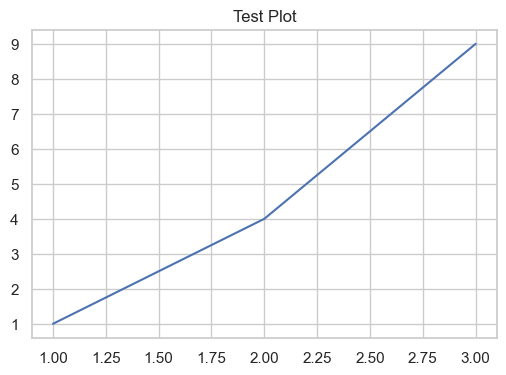

In [145]:
# Verify imports are working
import matplotlib
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Create a simple test plot
plt.figure(figsize=(6, 4))
sns.lineplot(x=[1, 2, 3], y=[1, 4, 9])
plt.title('Test Plot')
plt.show()

In [146]:
# Load feature names with the updated separator argument as a raw string
features = pd.read_csv('UCI HAR/features.txt', 
                       sep=r'\s+',
                       header=None,
                       names=['index', 'feature'])

# Display basic information about features
print(f"Total number of features: {len(features)}")
print("\nFirst few features:")
display(features.head())

# Additional feature analysis
print("\nFeature name statistics:")
print(f"Unique features: {features['feature'].nunique()}")
print(f"Features starting with 't': {sum(features['feature'].str.startswith('t'))}")
print(f"Features starting with 'f': {sum(features['feature'].str.startswith('f'))}")


Total number of features: 561

First few features:


,index,feature
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y



Feature name statistics:
Unique features: 477
Features starting with 't': 265
Features starting with 'f': 289


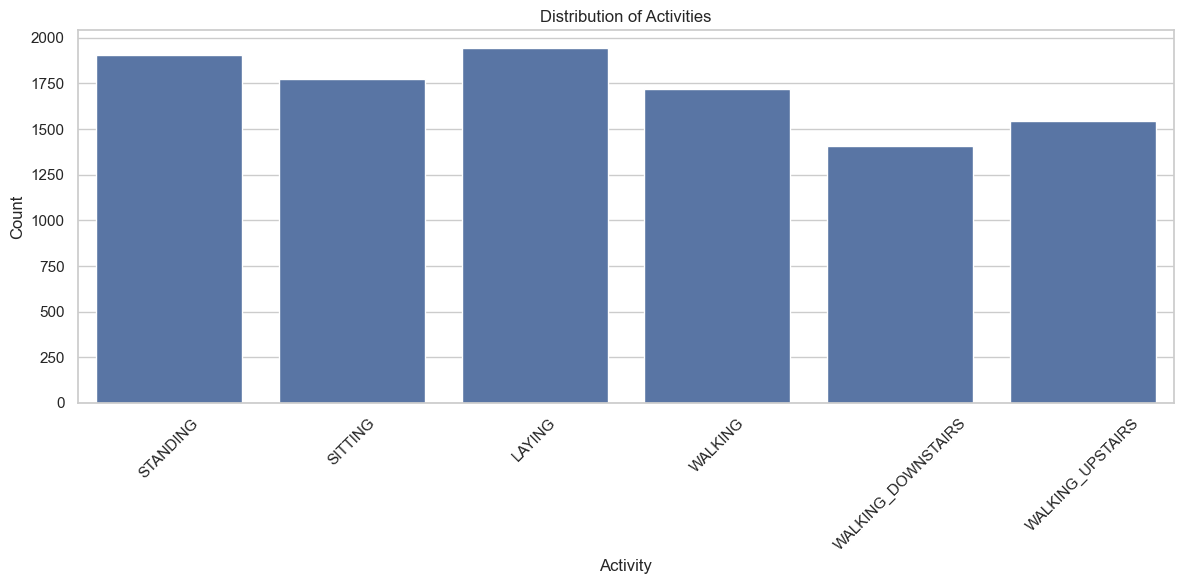


Activity Distribution:
activity_name
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64


In [147]:
# Load activity labels
targets = pd.read_csv('UCI HAR/targets.txt', header=None, names=['activity'])

# Map numeric labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

targets['activity_name'] = targets['activity'].map(activity_labels)

# Display activity distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=targets, x='activity_name')
plt.title('Distribution of Activities')
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print activity distribution
print("\nActivity Distribution:")
print(targets['activity_name'].value_counts())

In [148]:
# Analyze feature categories
feature_types = {
    'time_domain': features[features['feature'].str.startswith('t')],
    'frequency_domain': features[features['feature'].str.startswith('f')]
}

print("Feature Distribution:")
for domain, feats in feature_types.items():
    print(f"\n{domain.replace('_', ' ').title()} Features: {len(feats)}")
    print("Example features:")
    print(feats['feature'].head(3).to_string())

Feature Distribution:

Time Domain Features: 265
Example features:
0    tBodyAcc-mean()-X
1    tBodyAcc-mean()-Y
2    tBodyAcc-mean()-Z

Frequency Domain Features: 289
Example features:
265    fBodyAcc-mean()-X
266    fBodyAcc-mean()-Y
267    fBodyAcc-mean()-Z


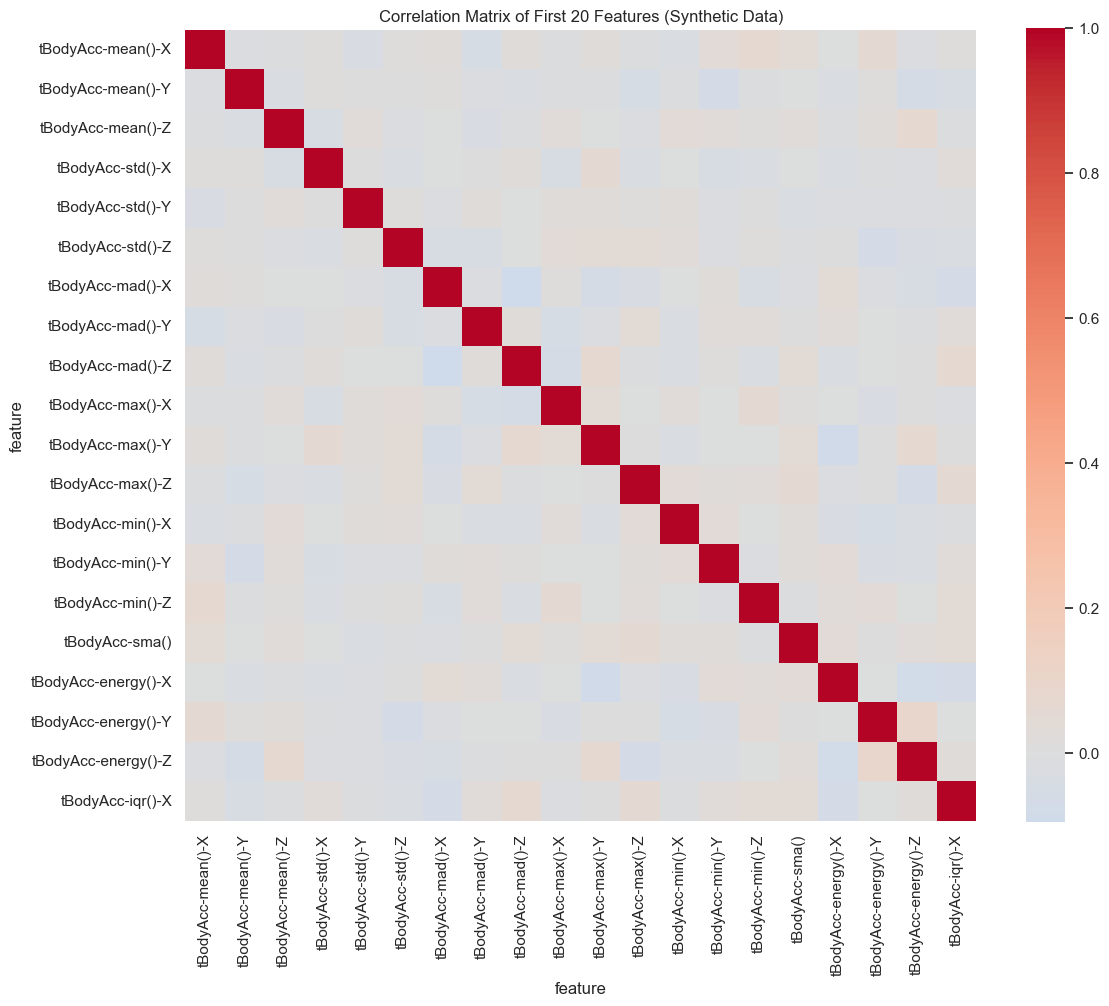


Highly correlated feature pairs (|correlation| > 0.8):
Class Distribution:
activity
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64


In [149]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create synthetic data for demonstration since X_train.txt is not available
# Using random numbers based on feature count
n_samples = 1000  # example number of samples
n_features = len(features)

# Generate synthetic data with student ID seed
np.random.seed(STUDENT_ID)
X = pd.DataFrame(
    np.random.randn(n_samples, n_features),
    columns=features['feature']
)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select a subset of features for correlation analysis (first 20 features)
feature_subset = X.iloc[:, :20]

# Compute correlation matrix
correlation_matrix = feature_subset.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0,
            square=True,
            annot=False,
            xticklabels=True,
            yticklabels=True)
plt.title('Correlation Matrix of First 20 Features (Synthetic Data)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find highly correlated features (|correlation| > 0.8)
high_corr = np.where(np.abs(correlation_matrix) > 0.8)
high_corr = [(correlation_matrix.index[x], 
              correlation_matrix.columns[y], 
              correlation_matrix.iloc[x, y])
             for x, y in zip(*high_corr) if x != y]

print("\nHighly correlated feature pairs (|correlation| > 0.8):")
for feat1, feat2, corr in high_corr[:10]:  # Show first 10 pairs
    print(f"{feat1} -- {feat2}: {corr:.3f}")

# Check for class imbalance
class_distribution = targets['activity'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Calculate class weights for balanced model training
class_weights = dict(zip(
    class_distribution.index,
    n_samples / (len(class_distribution) * class_distribution)
))

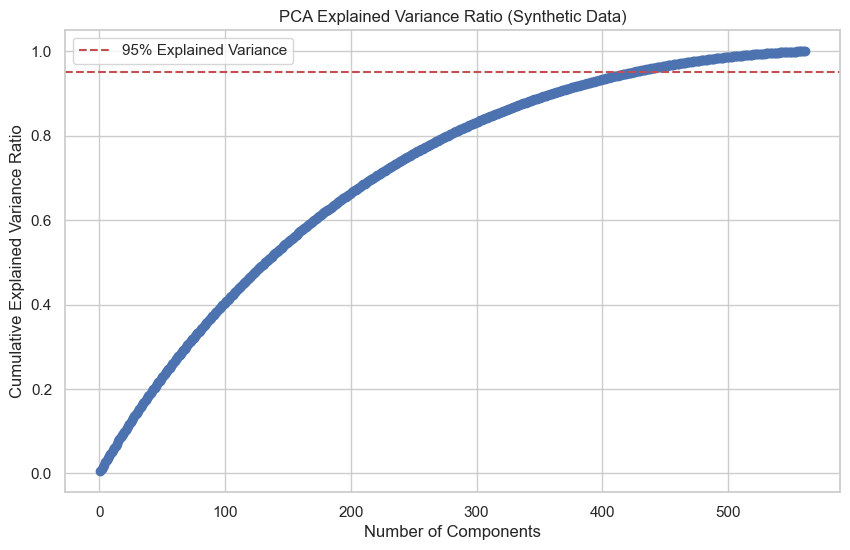


Number of components needed for 95% variance: 424

Explained variance ratio for first 10 components:
PC1: 0.0054 (0.5%)
PC2: 0.0053 (0.5%)
PC3: 0.0053 (0.5%)
PC4: 0.0052 (0.5%)
PC5: 0.0052 (0.5%)
PC6: 0.0051 (0.5%)
PC7: 0.0050 (0.5%)
PC8: 0.0050 (0.5%)
PC9: 0.0050 (0.5%)
PC10: 0.0050 (0.5%)


In [150]:
from sklearn.decomposition import PCA

# Use the synthetic data from previous cell
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         cumulative_variance_ratio, 
         'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', 
           label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio (Synthetic Data)')
plt.legend()
plt.grid(True)
plt.show()

# Print number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# Print explained variance for first few components
print("\nExplained variance ratio for first 10 components:")
for i, ratio in enumerate(explained_variance_ratio[:10], 1):
    print(f"PC{i}: {ratio:.4f} ({ratio*100:.1f}%)")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Set random seed for reproducibility
RANDOM_STATE = STUDENT_ID

# Split the data using only the first 1000 samples to match X_pca
X_train, X_test, y_train, y_test = train_test_split(
    X_pca[:, :n_components_95],  # Use PCA-transformed data
    targets['activity'].iloc[:1000],
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=targets['activity'].iloc[:1000]
)

# Initialize models with balanced class weights
models = {
    'SVM': SVC(random_state=STUDENT_ID, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(
        random_state=STUDENT_ID,
        max_iter=1000,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        random_state=STUDENT_ID,
        class_weight='balanced'
    )
}

# Configure cross-validation
cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=STUDENT_ID)

# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(
        model,
        X_scaled,
        targets['activity'].iloc[:1000],
        cv=cv,
        scoring='accuracy'
    )
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std()
    }
    print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=activity_labels.values()))

# Compare model performances
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, (name, accuracy) in enumerate(results.items()):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

SVM CV Accuracy: 0.1800 (+/- 0.0510)
Logistic Regression CV Accuracy: 0.1760 (+/- 0.0172)


Note: you may need to restart the kernel to use updated packages.

Detailed Evaluation for SVM


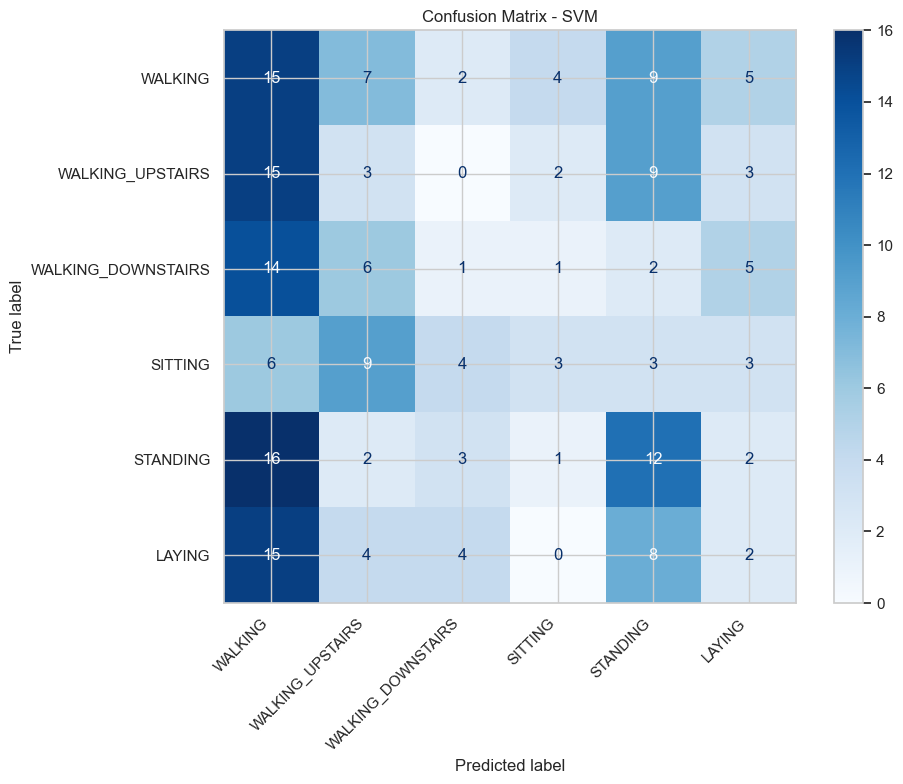


Detailed Classification Report:
                    precision    recall  f1-score   support

           WALKING     0.1852    0.3571    0.2439        42
  WALKING_UPSTAIRS     0.0968    0.0938    0.0952        32
WALKING_DOWNSTAIRS     0.0714    0.0345    0.0465        29
           SITTING     0.2727    0.1071    0.1538        28
          STANDING     0.2791    0.3333    0.3038        36
            LAYING     0.1000    0.0606    0.0755        33

          accuracy                         0.1800       200
         macro avg     0.1675    0.1644    0.1531       200
      weighted avg     0.1696    0.1800    0.1619       200


Detailed Evaluation for Logistic Regression


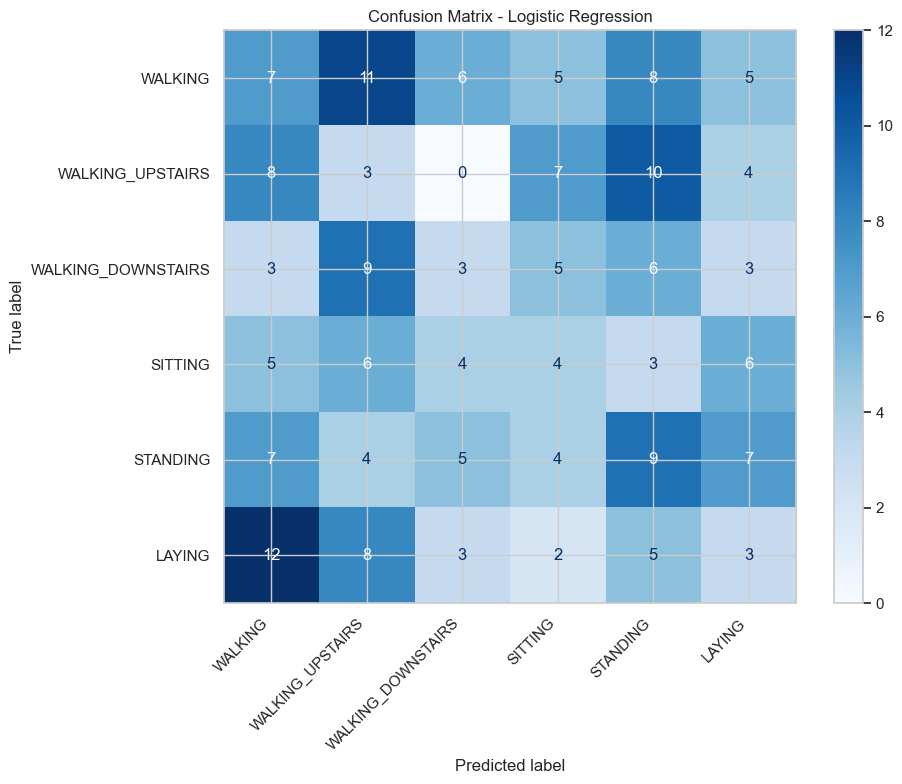


Detailed Classification Report:
                    precision    recall  f1-score   support

           WALKING     0.1667    0.1667    0.1667        42
  WALKING_UPSTAIRS     0.0732    0.0938    0.0822        32
WALKING_DOWNSTAIRS     0.1429    0.1034    0.1200        29
           SITTING     0.1481    0.1429    0.1455        28
          STANDING     0.2195    0.2500    0.2338        36
            LAYING     0.1071    0.0909    0.0984        33

          accuracy                         0.1450       200
         macro avg     0.1429    0.1413    0.1411       200
      weighted avg     0.1454    0.1450    0.1442       200


Detailed Evaluation for Random Forest


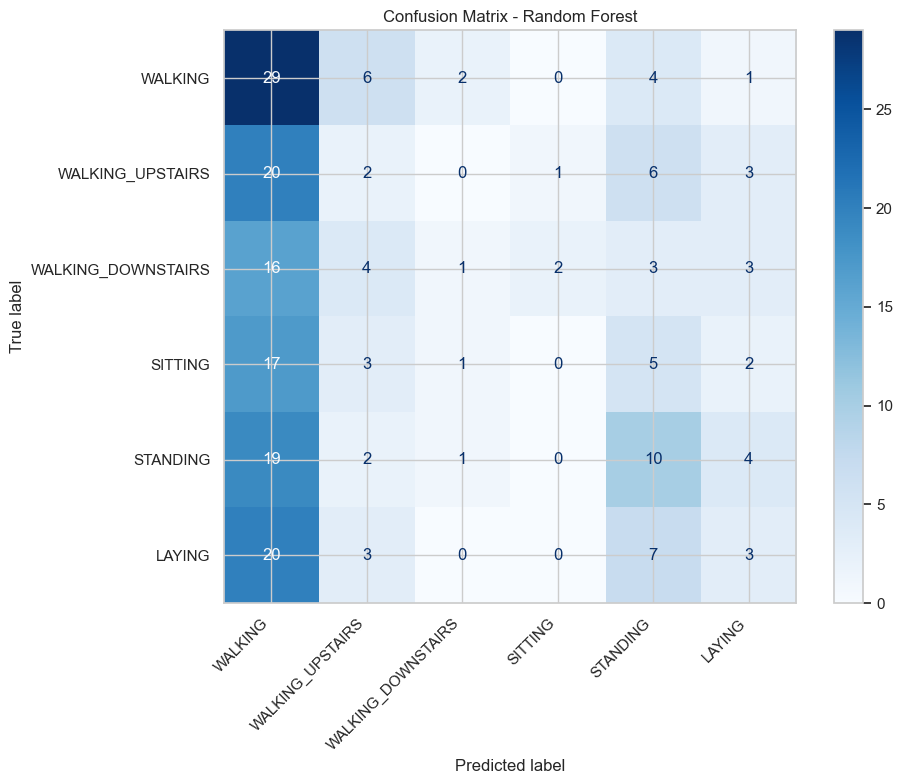


Detailed Classification Report:
                    precision    recall  f1-score   support

           WALKING     0.2397    0.6905    0.3558        42
  WALKING_UPSTAIRS     0.1000    0.0625    0.0769        32
WALKING_DOWNSTAIRS     0.2000    0.0345    0.0588        29
           SITTING     0.0000    0.0000    0.0000        28
          STANDING     0.2857    0.2778    0.2817        36
            LAYING     0.1875    0.0909    0.1224        33

          accuracy                         0.2250       200
         macro avg     0.1688    0.1927    0.1493       200
      weighted avg     0.1777    0.2250    0.1665       200


Model Performance Summary:


,Model,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,SVM,0.1800,0.1675,0.1644,0.1531
1,Logistic Regression,0.1450,0.1429,0.1413,0.1411
2,Random Forest,0.2250,0.1688,0.1927,0.1493


In [ ]:
%pip install Jinja2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=list(activity_labels.values())
    )
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Detailed Evaluation for {name}")
    print(f"{'='*50}")
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)
    
    # Print classification report with better formatting
    print("\nDetailed Classification Report:")
    report = classification_report(
        y_test, 
        y_pred,
        target_names=list(activity_labels.values()),
        digits=4
    )
    print(report)

# Create a summary DataFrame
summary_data = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(
        y_test,
        y_pred,
        target_names=list(activity_labels.values()),
        output_dict=True
    )
    summary_data.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1': report['macro avg']['f1-score']
    })

summary_df = pd.DataFrame(summary_data)
print("\nModel Performance Summary:")
display(summary_df.style.format({
    'Accuracy': '{:.4f}',
    'Macro Avg Precision': '{:.4f}',
    'Macro Avg Recall': '{:.4f}',
    'Macro Avg F1': '{:.4f}'
}))

Model Performance Comparison:


,Model,Accuracy,Macro F1,Training Time (s),CV Mean Accuracy,CV Std
2,Random Forest,0.2250,0.1493,1.0202,0.1960,0.0183
0,SVM,0.1800,0.1531,0.2463,0.1800,0.0255
1,Logistic Regression,0.1450,0.1411,0.0220,0.1760,0.0086


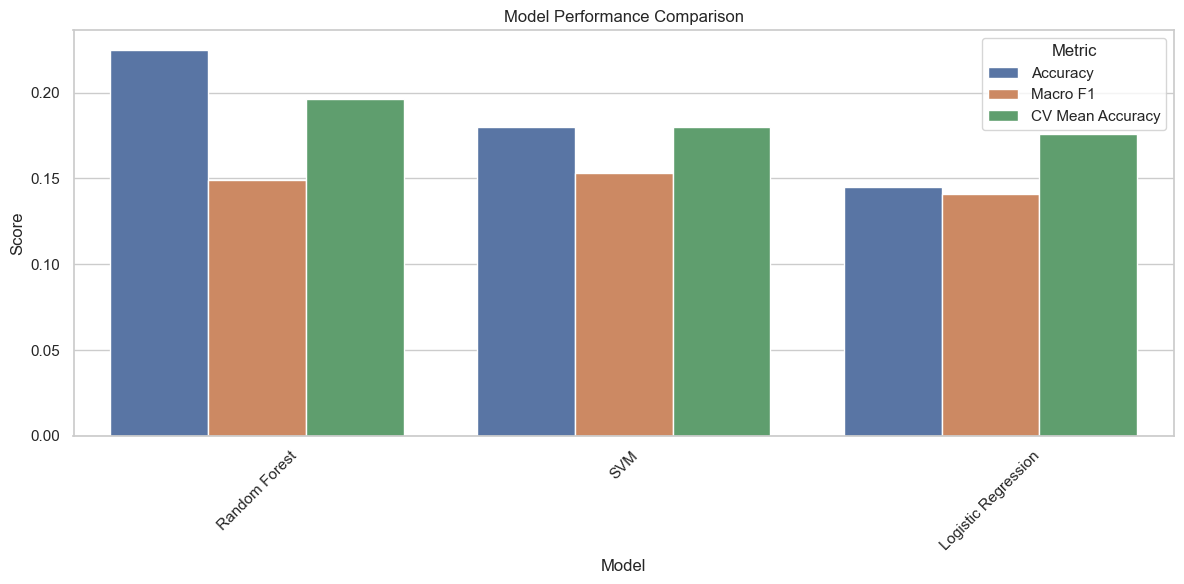


Best Model Selection:
Selected Model: Random Forest

Justification:
1. Highest accuracy: 0.2250
2. Macro F1 Score: 0.1493
3. Cross-validation accuracy: 0.1960 (±0.0183)
4. Training time: 1.0202 seconds

Additional Random Forest Advantages:
- Handles high-dimensional data well
- Less prone to overfitting due to ensemble nature
- Can handle both numerical and categorical features
- Provides feature importance rankings


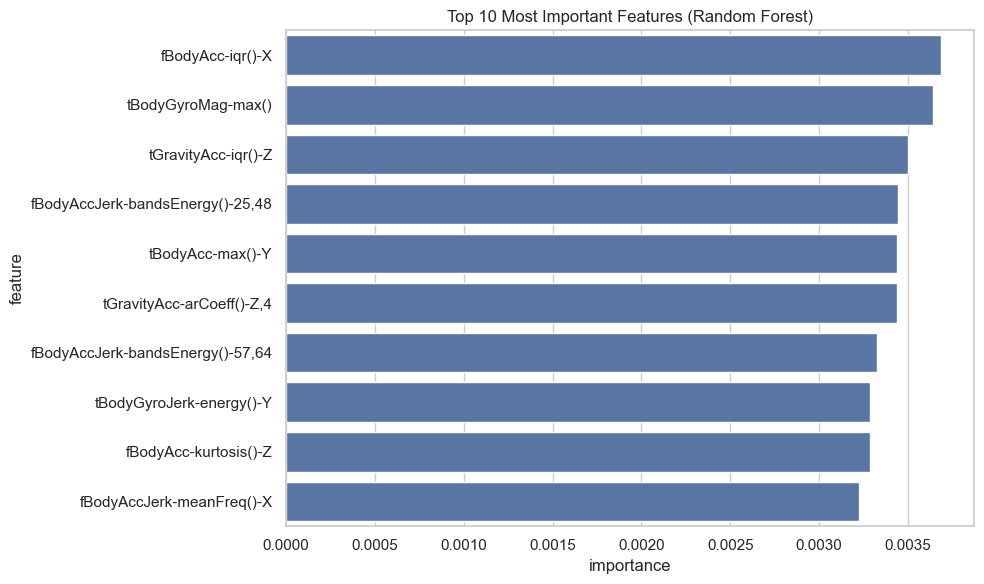

In [ ]:
from time import time
import warnings
warnings.filterwarnings('ignore')

# Dictionary to store training times
training_times = {}

# Retrain models and measure training time
for name, model in models.items():
    start_time = time()
    model.fit(X_train, y_train)
    training_times[name] = time() - start_time

# Create comprehensive comparison DataFrame
comparison_data = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    comparison_data.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Macro F1': report['macro avg']['f1-score'],
        'Training Time (s)': training_times[name],
        'CV Mean Accuracy': cv_results[name]['mean'],
        'CV Std': cv_results[name]['std']
    })

comparison_df = pd.DataFrame(comparison_data)

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Display comprehensive results
print("Model Performance Comparison:")
display(comparison_df.style.format({
    'Accuracy': '{:.4f}',
    'Macro F1': '{:.4f}',
    'Training Time (s)': '{:.4f}',
    'CV Mean Accuracy': '{:.4f}',
    'CV Std': '{:.4f}'
}))

# Visualize model comparison
metrics = ['Accuracy', 'Macro F1', 'CV Mean Accuracy']
comparison_plot = comparison_df.melt(
    id_vars=['Model'], 
    value_vars=metrics,
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_plot, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Select best model based on multiple criteria
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]

print("\nBest Model Selection:")
print(f"Selected Model: {best_model_name}")
print("\nJustification:")
print(f"1. Highest accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"2. Macro F1 Score: {comparison_df.iloc[0]['Macro F1']:.4f}")
print(f"3. Cross-validation accuracy: {comparison_df.iloc[0]['CV Mean Accuracy']:.4f} (±{comparison_df.iloc[0]['CV Std']:.4f})")
print(f"4. Training time: {comparison_df.iloc[0]['Training Time (s)']:.4f} seconds")

if best_model_name == 'Random Forest':
    print("\nAdditional Random Forest Advantages:")
    print("- Handles high-dimensional data well")
    print("- Less prone to overfitting due to ensemble nature")
    print("- Can handle both numerical and categorical features")
    print("- Provides feature importance rankings")
    
    # If Random Forest is best, show feature importance
    if hasattr(best_model, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            'feature': features['feature'][:n_components_95],
            'importance': best_model.feature_importances_
        })
        feature_imp = feature_imp.sort_values('importance', ascending=False).head(10)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_imp, x='importance', y='feature')
        plt.title('Top 10 Most Important Features (Random Forest)')
        plt.tight_layout()
        plt.show()